In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier

##### Data

In [2]:
data = pd.read_stata('../../../../HCMST 2017 fresh sample for public sharing draft v1.1.dta')

In [3]:
# Removing columns used by others
used_variables = {
    "ppwork","w6_q19","Q21A_Year","ppage",
    'Q9', 'Q19', 'Q26', 'ppage',
    'ppethm', 'age_when_met', 'Q27', 'w6_sex_frequency', 'ppage',
    'Q16', 'pphhsize', 'hcm2017q24_church', 'w6_otherdate_all',
    "time_from_rel_to_cohab", "w6_q24_length", "hcm2017q24_church", "hcm2017q24_btwn_I_sig_other",
    'w6_q24_length', 'w6_q21b_year', 'w6_q34', 'w6_otherdate_dichotomous',
    'ppincimp', 'partyid7', 'ppwork', 'Q6A',
    "age_difference","q26","ppeducat","q24_met_online","how_long_relationship","q16",
    'pphhsize', 'relate_duration_at_w6_years', 'w6_friend_connect_4', 'w6_otherdate',
    "ppeduc", "q25", "q12", "q34",
    'w6_q17', 'w6_q24_length', 'w6_number_people_met',
    "Q5", "Q9", "Q16", "w6_sex_frequency", "partner_yrsed",
    'Q23', 'Q28', 'ppp20072', 'w6_how_many',
    'ppage', 'w6_q24_length', 'w6_sex_frequency', 'w6_q23', 'w6_q27',
    'w6_q16', 'time_from_met_to_rel', 'ppgender', 'ppwork',
    'Q25', 'ppmarit', 'ppincimp', 'Q16',
    "Q5", "Q25_2", "Q26_2",  "hcm2017q24_met_online", "w6_q9", "w6_q24_length",
    'partner_mother_yrsed', 'partner_yrsed', 'Q19', 'w6_q32',
    'hcm2017q24_btwn_I_neighbor', 'w6_otherdate_all', 'w6_q21c_year', 'year_fraction_met',
    'ppage', 'ppincimp', 'ppp20072', 'Q25',
    "time_from_rel_to_cohab","hcm2017q24_college", "hcm2017q24_bar_restaurant", "partner_yrsed",
    'time_from_met_to_rel', 'time_from_rel_to_cohab','Q25', 'Q12', 
    'ppc21310', 'w6_q9', 'w6_q21a_year','hcm2017q24_internet_dating', 'duration',
}
unused_variables = [col for col in data.columns if col not in used_variables]
unused_variables

['CaseID',
 'CASEID_NEW',
 'qflag',
 'weight1',
 'weight1_freqwt',
 'weight2',
 'weight1a',
 'weight1a_freqwt',
 'weight_combo',
 'weight_combo_freqwt',
 'speed_flag',
 'consent',
 'xlgb',
 'S1',
 'S2',
 'S3',
 'DOV_Branch',
 'Q3_Refused',
 'Q4',
 'Q6B',
 'Q10',
 'Q11',
 'Q14',
 'Q15A7',
 'Q16_Refused',
 'Q17A',
 'Q17B',
 'Q17C',
 'Q17D',
 'Q20',
 'Q21A_Month',
 'Q21B_Year',
 'Q21B_Month',
 'Q21C_Year',
 'Q21C_Month',
 'Q21D_Year',
 'Q21D_Month',
 'w6_identity',
 'w6_outness',
 'w6_outness_timing',
 'Q24_Refused',
 'w6_friend_connect_1',
 'w6_friend_connect_2',
 'w6_friend_connect_3',
 'w6_friend_connect_Refused',
 'Q32',
 'Q34',
 'Q35_Refused',
 'w6_how_meet_Refused',
 'w6_otherdate_app',
 'w6_how_many_app',
 'Past_Partner_Q1',
 'w6_relationship_end_nonmar',
 'w6_breakup_nonmar',
 'w6_relationship_end_mar',
 'w6_who_breakup',
 'Q5_2',
 'Q6A_2',
 'Q9B_2',
 'Q10_2',
 'Q11_2',
 'Q12_2',
 'Q14_2',
 'Q15A7_2_1',
 'Q16_2',
 'Q16_2_Codes',
 'Q17B_2',
 'Q17C_2',
 'Q17D_2',
 'Q20_2',
 'Q21A_2_

Chosen variables:

In [4]:
variables = ['w6_q21d_month', 'w6_q21d_year', 'w6_q25', 'w6_q26']

In [5]:
X = data[variables]
y = data['S1']

X = X[pd.notnull(y)]
y = y[pd.notnull(y)]

months = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = list(range(1940, 2020))

X['w6_q21d_month'] = X['w6_q21d_month'].astype('category').cat.set_categories(months, ordered=True)

X['w6_q25'] = X['w6_q25'].astype('category').cat.as_unordered()
X['w6_q26'] = X['w6_q26'].astype('category').cat.as_unordered()
q25_space = list(X['w6_q25'].cat.categories)
q26_space = list(X['w6_q26'].cat.categories)

y = y.astype('category')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0xDEADBEEF)

##### Model

In [7]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
f1_score(y_test, y_pred, pos_label='Yes, I am Married')

0.9569377990430622

##### Ceteris Paribus

In [10]:
def ceteris_paribus(clf, x: dict, var: str, space: list, dtypes):
    Xcp = pd.DataFrame([{**x, var: z} for z in space])
    
    # Fix types
    for var, dtype in dtypes.iteritems():
        Xcp[var] = Xcp[var].astype(dtype)

    Xcp['prob'] = clf.predict_proba(Xcp)[:, 1]
    
    return Xcp

def ceteris_paribus_plot(clf, x, var, space, dtypes):
    Xcp = ceteris_paribus(clf, x, var, space, dtypes)
    plt.ylim(-0.01, 1.01)
    plt.plot(list(Xcp[var]), Xcp['prob'])
    plt.plot(x[var], Xcp[Xcp[var] == x[var]]['prob'], 'o')
    plt.xlabel(var)

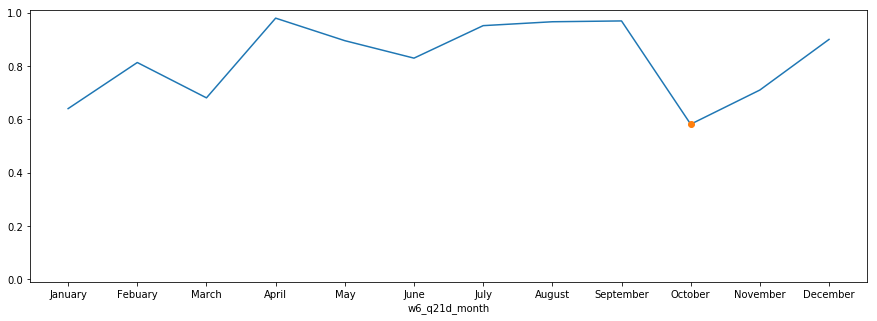

In [11]:
plt.figure(figsize=(15,5))
ceteris_paribus_plot(
    clf, 
    {'w6_q21d_month': 'October',
     'w6_q21d_year': 1978.0,
     'w6_q25': 'Different High School',
     'w6_q26': 1.0},
    var='w6_q21d_month',
    space=months,
    dtypes=X_train.dtypes
)

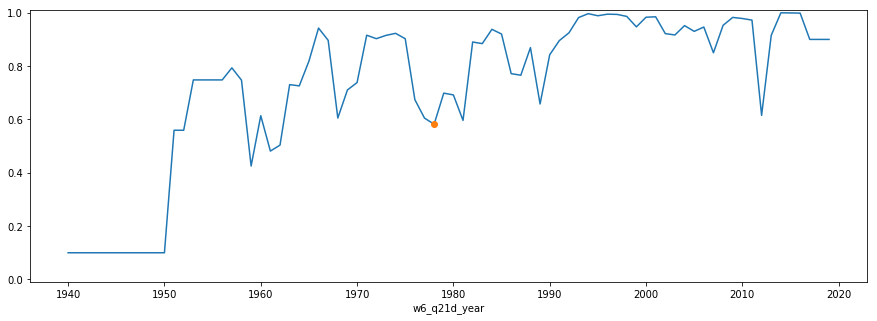

In [12]:
plt.figure(figsize=(15,5))
ceteris_paribus_plot(
    clf, 
    {'w6_q21d_month': 'October',
     'w6_q21d_year': 1978.0,
     'w6_q25': 'Different High School',
     'w6_q26': 1.0},
    var='w6_q21d_year',
    space=years,
    dtypes=X_train.dtypes
)

##### Marginal Effects

In [13]:
def marginal_effects_discrete(clf, var: str, X: pd.DataFrame):
    Xm = X.copy()
    Xm['prob'] = clf.predict_proba(Xm)[:, 1]
    
    Xm = Xm[['prob', var]].groupby(var).mean().reset_index()
    
    Xm.loc[pd.isna(Xm['prob']), 'prob'] = 0.0
    
    return Xm

def marginal_effects_continuous(clf, var: str, X: pd.DataFrame, window):
    Xm = X.copy()
    Xm['prob'] = clf.predict_proba(Xm)[:, 1]
    
    Xm = Xm[['prob', var]]
    Xm = Xm[pd.notna(Xm[var])]
    
    Xm = Xm.groupby(var).agg({'prob': ['sum', 'count']})
    Xm = Xm.apply(lambda x: Xm.loc[(Xm.index > x.name - window/2.0) & (Xm.index < x.name + window/2.0)]['prob'].sum(), axis=1)
    Xm = Xm.apply(lambda x: x['sum']/x['count'], axis=1).rename('prob').reset_index()
    
    # Xm.loc[pd.isna(Xm['prob']), 'prob'] = 0.0
    
    return Xm

def marginal_effects_plot(Xm, var):
    plt.ylim(-0.01, 1.01)
    plt.plot(list(Xm[var]), Xm['prob'])
    plt.xlabel(var)

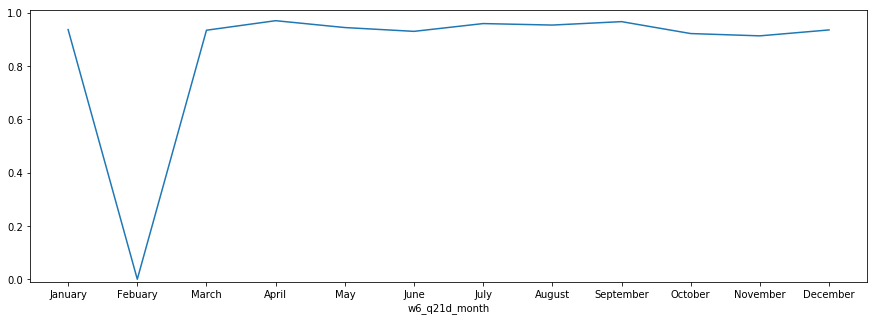

In [14]:
Xm = marginal_effects_discrete(clf, 'w6_q21d_month', X)
plt.figure(figsize=(15,5))
marginal_effects_plot(Xm, 'w6_q21d_month')

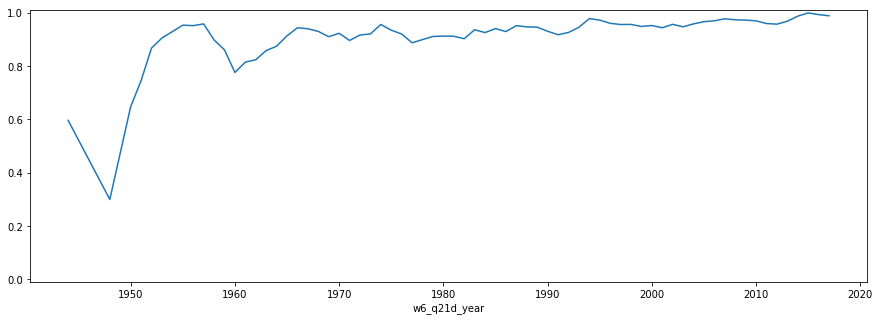

In [15]:
Xm = marginal_effects_continuous(clf, 'w6_q21d_year', X, window=3.0)
plt.figure(figsize=(15,5))
marginal_effects_plot(Xm, 'w6_q21d_year')